In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from pathlib import Path
csvpath = Path('./Resources/AVG_final.csv')
df = pd.read_csv(csvpath, index_col='Date', parse_dates=True, infer_datetime_format=True)
df.head()

,Market Return,Portfolio Return
Date,,
2018-07-02,1.002766,1.003605
2018-07-03,0.998673,0.997506
2018-07-05,1.007006,1.005681
2018-07-06,1.015414,1.013786
2018-07-09,1.024706,1.025926


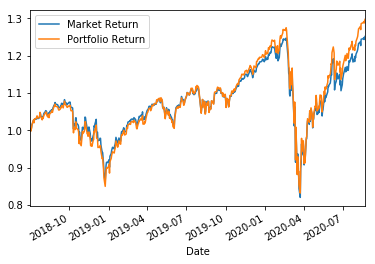

In [3]:
df.plot()

In [4]:
portfolio = df["Portfolio Return"].to_frame().dropna()
portfolio.head(2)

,Portfolio Return
Date,
2018-07-02,1.003605
2018-07-03,0.997506


### Augmented Dickey-Fuller Test

In [5]:
from statsmodels.tsa.stattools import adfuller
adfuller(portfolio)

(-1.8090621132150262,
 0.37597197803315296,
 9,
 528,
 {'1%': -3.4427957890025533,
  '5%': -2.867029512430173,
  '10%': -2.5696937122646926},
 -2831.2285289527854)

P-value is more than 0.05 indicating the data is non-statinary

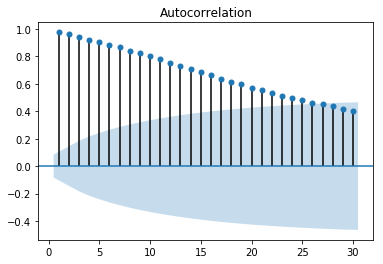

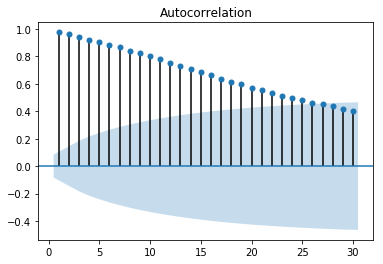

In [6]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
# Plot the autocorrelation of the Settle Prices
plot_acf(portfolio, zero=False, lags=30)

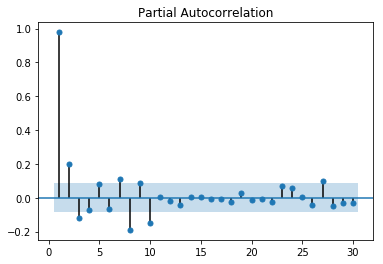

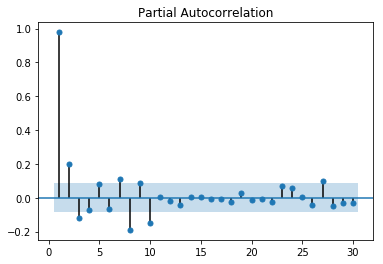

In [7]:
# Plot the partial autocorrelation of the returns
plot_pacf(portfolio, zero=False, lags=30)

In [8]:
from pmdarima.arima import auto_arima
step_wise=auto_arima(portfolio,
 start_p=1, start_q=1, 
 max_p=7, max_q=7, 
 d=1, max_d=7,
 trace=True, 
 error_action='ignore', 
 suppress_warnings=True, 
 stepwise=True)

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-2892.386, Time=0.43 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-2855.565, Time=0.09 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-2889.249, Time=0.20 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-2880.063, Time=0.29 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-2857.001, Time=0.04 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-2894.577, Time=0.67 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=-2897.600, Time=0.14 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=-2899.829, Time=0.35 sec
 ARIMA(4,1,0)(0,0,0)[0] intercept   : AIC=-2903.832, Time=0.27 sec
 ARIMA(5,1,0)(0,0,0)[0] intercept   : AIC=-2903.985, Time=0.34 sec
 ARIMA(6,1,0)(0,0,0)[0] intercept   : AIC=-2910.135, Time=0.49 sec
 ARIMA(7,1,0)(0,0,0)[0] intercept   : AIC=-2932.401, Time=0.84 sec
 ARIMA(7,1,1)(0,0,0)[0] intercept   : AIC=-2942.017, Time=1.63 sec
 ARIMA(6,1,1)(0,0,0)[0] intercept   : AIC=-2937.546, Time=1.55 sec
 ARIMA(7,1,2)(0,0,0

In [9]:
step_wise.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  538
Model:               SARIMAX(7, 1, 1)   Log Likelihood                1481.245
Date:                Wed, 26 Aug 2020   AIC                          -2944.490
Time:                        12:37:46   BIC                          -2905.916
Sample:                             0   HQIC                         -2929.400
                                - 538                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.7129      0.089     -7.979      0.000      -0.888      -0.538
ar.L2          0.0405      0.033      1.234      0.217      -0.024       0.105
ar.L3          0.1628      0.033      4.943      0.000       0.098       0.227
ar.L4         -0.0469      0.033     -1.421      0.155      -0.112       0.018
ar.L5         -0.0340      0.039     -0.873      0.383      -0.110       0.042
ar.L6         -0.0599      0.037     -1.633      0.103      -0.132       0.012
ar.L7          0.1512      0.038      3.999      0.000       0.077       0.225
ma.L1          0.5696      0.090      6.305      0.000       0.393       0.747
sigma2         0.0002    7.3e-06     32.164      0.000       0.000       0.000
===================================================================================
Ljung-Box (Q):                       36.61   Jarque-Bera (JB):              1251.63
Prob(Q):                              0.62   Prob(JB):                         0.00
Heteroskedasticity (H):               4.31   Skew:                            -0.95
Prob(H) (two-sided):                  0.00   Kurtosis:                        10.23
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

## ARIMA Model

In [10]:
from statsmodels.tsa.arima_model import ARIMA

In [11]:
# Create an ARIMA model
model = ARIMA(portfolio, order=(7, 1, 1))

C:\Users\Sungwon Kim\anaconda3\envs\dev\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Sungwon Kim\anaconda3\envs\dev\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


In [12]:
# Fit the model to the data
results = model.fit()

In [13]:
# Print the model summary
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:     D.Portfolio Return   No. Observations:                  537
Model:                 ARIMA(7, 1, 1)   Log Likelihood                1481.580
Method:                       css-mle   S.D. of innovations              0.015
Date:                Wed, 26 Aug 2020   AIC                          -2943.159
Time:                        12:37:49   BIC                          -2900.299
Sample:                             1   HQIC                         -2926.393
                                                                              
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                        0.0006      0.001      0.802      0.422      -0.001       0.002
ar.L1.D.Portfolio Return    -0.7226      0.104     -6.918      0.000      -0.927      -0.518
ar.L2.D.Portfolio Return     0.0387      0.056      0.692      0.489      -0.071       0.148
ar.L3.D.Portfolio Return     0.1609      0.054      2.956      0.003       0.054       0.268
ar.L4.D.Portfolio Return    -0.0509      0.054     -0.951      0.342      -0.156       0.054
ar.L5.D.Portfolio Return    -0.0357      0.053     -0.675      0.500      -0.139       0.068
ar.L6.D.Portfolio Return    -0.0584      0.053     -1.108      0.268      -0.162       0.045
ar.L7.D.Portfolio Return     0.1464      0.051      2.866      0.004       0.046       0.246
ma.L1.D.Portfolio Return     0.5814      0.100      5.813      0.000       0.385       0.777
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -0.9989           -0.4365j            1.0901           -0.4344
AR.2           -0.9989           +0.4365j            1.0901            0.4344
AR.3           -0.5022           -1.2257j            1.3245           -0.3119
AR.4           -0.5022           +1.2257j            1.3245            0.3119
AR.5            0.9416           -1.1281j            1.4694           -0.1393
AR.6            0.9416           +1.1281j            1.4694            0.1393
AR.7            1.5178           -0.0000j            1.5178           -0.0000
MA.1           -1.7199           +0.0000j            1.7199            0.5000
-----------------------------------------------------------------------------
"""

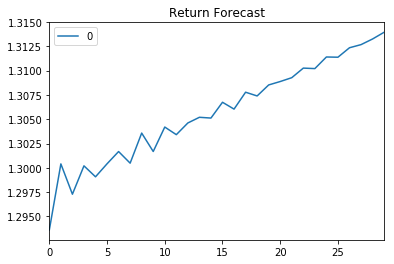

In [14]:
# create a dataframe that holds the forecast values.
return_forecast = pd.DataFrame(results.forecast(steps=30)[0])
# Visualize the forecast
return_forecast.plot(title="Return Forecast")

## Forecast Market Return 

In [15]:
market = df["Market Return"].to_frame().dropna()
market.head(2)

,Market Return
Date,
2018-07-02,1.002766
2018-07-03,0.998673


In [16]:
from pmdarima.arima import auto_arima
step_wise=auto_arima(market,
 start_p=1, start_q=1, 
 max_p=7, max_q=7, 
 d=1, max_d=7,
 trace=True, 
 error_action='ignore', 
 suppress_warnings=True, 
 stepwise=True)

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-2946.308, Time=0.54 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-2907.627, Time=0.14 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-2942.425, Time=0.23 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-2932.675, Time=0.22 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-2909.181, Time=0.04 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-2951.490, Time=0.71 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=-2952.185, Time=0.30 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=-2953.594, Time=0.39 sec
 ARIMA(4,1,0)(0,0,0)[0] intercept   : AIC=-2960.419, Time=0.32 sec
 ARIMA(5,1,0)(0,0,0)[0] intercept   : AIC=-2960.733, Time=0.46 sec
 ARIMA(6,1,0)(0,0,0)[0] intercept   : AIC=-2965.183, Time=0.52 sec
 ARIMA(7,1,0)(0,0,0)[0] intercept   : AIC=-2989.695, Time=0.82 sec
 ARIMA(7,1,1)(0,0,0)[0] intercept   : AIC=-2999.727, Time=1.68 sec
 ARIMA(6,1,1)(0,0,0)[0] intercept   : AIC=-2989.848, Time=1.48 sec
 ARIMA(7,1,2)(0,0,0

In [17]:
step_wise.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  538
Model:               SARIMAX(7, 1, 1)   Log Likelihood                1510.359
Date:                Wed, 26 Aug 2020   AIC                          -3002.719
Time:                        12:38:09   BIC                          -2964.145
Sample:                             0   HQIC                         -2987.629
                                - 538                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.7080      0.081     -8.757      0.000      -0.866      -0.550
ar.L2          0.0545      0.032      1.685      0.092      -0.009       0.118
ar.L3          0.1549      0.031      4.936      0.000       0.093       0.216
ar.L4         -0.0785      0.031     -2.500      0.012      -0.140      -0.017
ar.L5         -0.0439      0.038     -1.152      0.249      -0.119       0.031
ar.L6         -0.0409      0.035     -1.160      0.246      -0.110       0.028
ar.L7          0.1657      0.034      4.824      0.000       0.098       0.233
ma.L1          0.5695      0.082      6.913      0.000       0.408       0.731
sigma2         0.0002   6.45e-06     32.684      0.000       0.000       0.000
===================================================================================
Ljung-Box (Q):                       34.98   Jarque-Bera (JB):              1438.93
Prob(Q):                              0.70   Prob(JB):                         0.00
Heteroskedasticity (H):               4.10   Skew:                            -1.00
Prob(H) (two-sided):                  0.00   Kurtosis:                        10.76
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [18]:
# Create an ARIMA model
model_1 = ARIMA(market, order=(7, 1, 1))

C:\Users\Sungwon Kim\anaconda3\envs\dev\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Sungwon Kim\anaconda3\envs\dev\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


In [19]:
# Fit the model to the data
results_1 = model_1.fit()

In [20]:
# Print the model summary
results_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:        D.Market Return   No. Observations:                  537
Model:                 ARIMA(7, 1, 1)   Log Likelihood                1510.616
Method:                       css-mle   S.D. of innovations              0.015
Date:                Wed, 26 Aug 2020   AIC                          -3001.232
Time:                        12:38:12   BIC                          -2958.372
Sample:                             1   HQIC                         -2984.465
                                                                              
=========================================================================================
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.0005      0.001      0.717      0.474      -0.001       0.002
ar.L1.D.Market Return    -0.7104      0.102     -6.942      0.000      -0.911      -0.510
ar.L2.D.Market Return     0.0516      0.055      0.932      0.351      -0.057       0.160
ar.L3.D.Market Return     0.1529      0.054      2.824      0.005       0.047       0.259
ar.L4.D.Market Return    -0.0803      0.053     -1.521      0.128      -0.184       0.023
ar.L5.D.Market Return    -0.0454      0.053     -0.863      0.388      -0.149       0.058
ar.L6.D.Market Return    -0.0408      0.052     -0.780      0.435      -0.143       0.062
ar.L7.D.Market Return     0.1652      0.050      3.300      0.001       0.067       0.263
ma.L1.D.Market Return     0.5714      0.098      5.805      0.000       0.378       0.764
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -0.9961           -0.4352j            1.0870           -0.4344
AR.2           -0.9961           +0.4352j            1.0870            0.4344
AR.3           -0.5160           -1.2106j            1.3159           -0.3141
AR.4           -0.5160           +1.2106j            1.3159            0.3141
AR.5            0.8950           -1.0937j            1.4132           -0.1408
AR.6            0.8950           +1.0937j            1.4132            0.1408
AR.7            1.4811           -0.0000j            1.4811           -0.0000
MA.1           -1.7500           +0.0000j            1.7500            0.5000
-----------------------------------------------------------------------------
"""

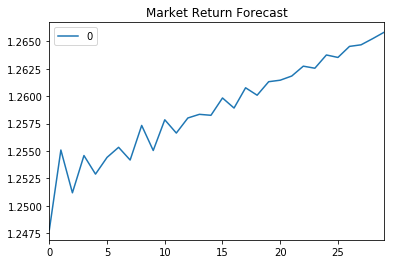

In [21]:
# create a dataframe that holds the forecast values.
market_return_forecast = pd.DataFrame(results_1.forecast(steps=30)[0])

# Visualize the forecast
market_return_forecast.plot(title="Market Return Forecast")

In [31]:
# concatenate the dataframes
forecast_df = pd.concat([market_return_forecast, return_forecast], axis=1)
forecast_df.columns = [ "Market Return Forecast", "Portfolio Return Forecast"]
forecast_df.index = pd.bdate_range(start='8/24/2020', periods = 30)
forecast_df.index.names = ['Date']
forecast_df.head()

,Market Return Forecast,Portfolio Return Forecast
Date,,
2020-08-24,1.247800,1.293612
2020-08-25,1.255084,1.300404
2020-08-26,1.251183,1.297286
2020-08-27,1.254580,1.300204
2020-08-28,1.252888,1.299077


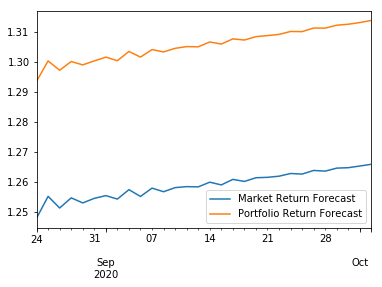

In [23]:
forecast_df.plot()

In [24]:
final_df = pd.concat([df, forecast_df], axis=0, sort=False)

<Figure size 432x288 with 0 Axes>

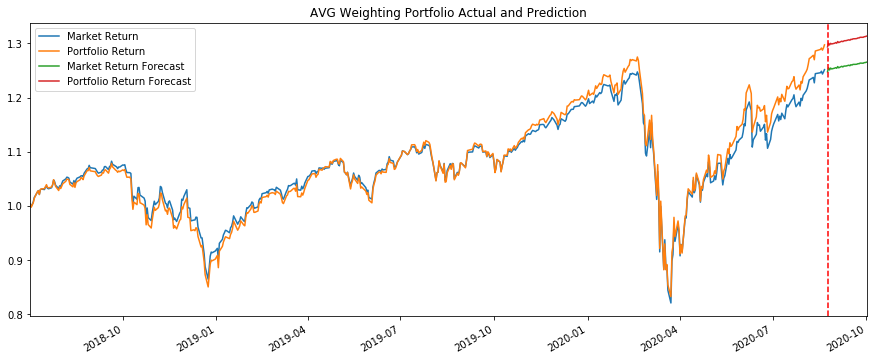

In [25]:
plt.figure();
final_df.plot(figsize=(15,6))
plt.title('AVG Weighting Portfolio Actual and Prediction')
plt.axvline(forecast_df.index[0], color='r', linestyle='--')

In [32]:
forecast_df.to_csv("./Resources/forecast_arima_avg.csv")